<a href="https://colab.research.google.com/github/Rociolivingstonux/Challenge-Data-Science-Alura-/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


In [3]:
todas_las_tiendas.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')

#1. Análisis de facturación



Análisis de facturación por tienda.


In [4]:
facturacion_por_tienda = todas_las_tiendas.groupby("Tienda")["Precio"].sum()
print(facturacion_por_tienda)

Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


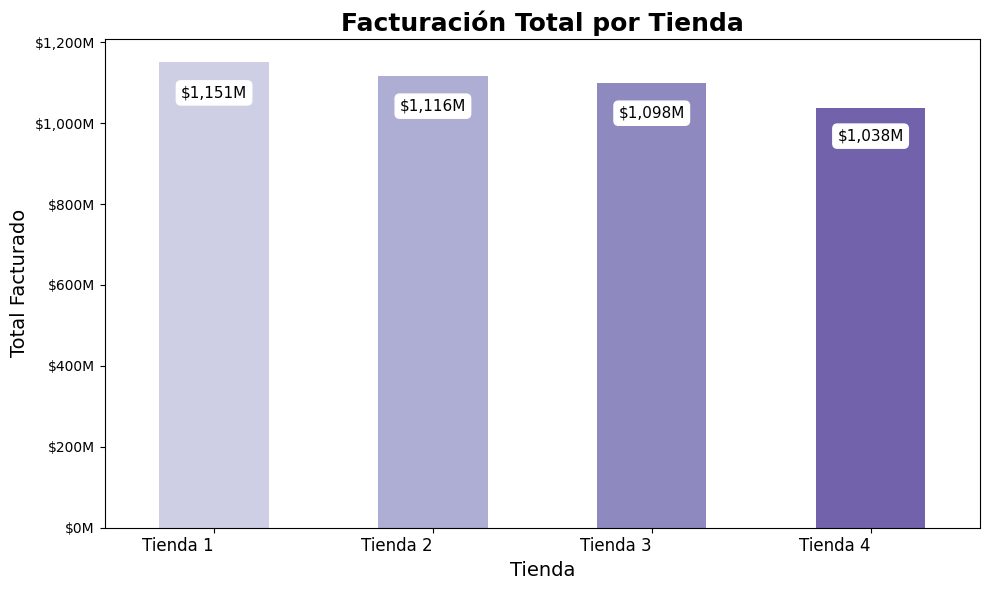

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Datos agrupados por tienda
facturacion_por_tienda = todas_las_tiendas.groupby("Tienda")["Precio"].sum()

# Función para convertir números a millones con formato
def millones(x, pos=None):
    """
    Esta función convierte un número y le da formato de millones (M) sin decimales
    """
    return f'${x/1_000_000:,.0f}M'

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Generar una paleta de colores lilas
colores_lilas = plt.cm.Purples(np.linspace(0.3, 0.7, len(facturacion_por_tienda)))

# Establecer las barras con colores diferentes para cada tienda
ax = facturacion_por_tienda.plot(
    kind="bar",
    color=colores_lilas,
    edgecolor="none"  # Eliminar bordes
)

# Título estilizado
plt.title("Facturación Total por Tienda", fontsize=18, fontweight="bold", color="black")

# Etiquetas de ejes
plt.ylabel("Total Facturado", fontsize=14, color="black")
plt.xlabel("Tienda", fontsize=14, color="black")

# Mejorar la legibilidad del eje X
plt.xticks(rotation=0, ha="right", fontsize=12)

# Aplicar formato en el eje Y usando la función millones
ax.yaxis.set_major_formatter(mtick.FuncFormatter(millones))

# Agregar etiquetas dentro de cada barra (cerca del final) con borde
for i, valor in enumerate(facturacion_por_tienda):
    ax.text(
        i, valor * 0.95,  # Posición dentro de la barra (95% del alto)
        f'${valor/1_000_000:,.0f}M',
        ha='center', va='top',
        fontsize=11, color='black',
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3')
    )


# Ajustar diseño
plt.tight_layout()
plt.show()





# 2. Ventas por categoría


In [ ]:
ventas_por_categoria = todas_las_tiendas.groupby(["Tienda", "Categoría del Producto"])["Precio"].sum().unstack()

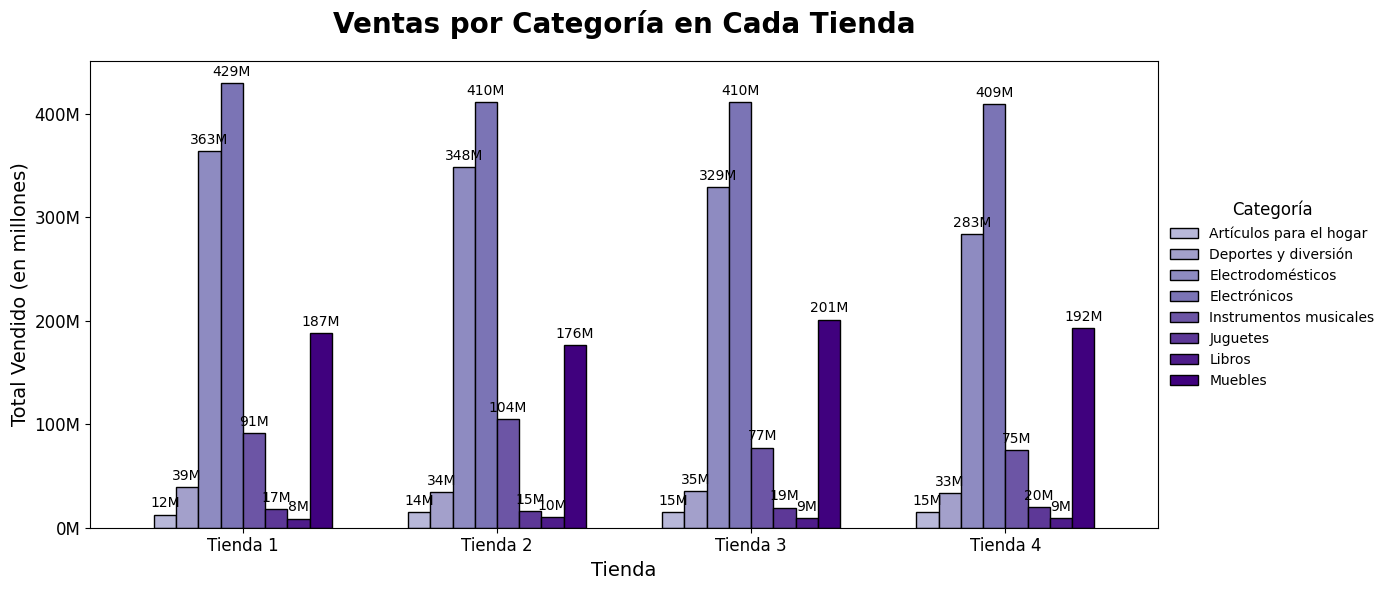

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(14, 6))

# Paleta lila (Purples)
colores = plt.cm.Purples(
    range(100, 256, int(155 / (len(ventas_por_categoria.columns)-1)))
)

# Gráfico
barras = ventas_por_categoria.plot(
    kind="bar",
    ax=ax,
    edgecolor="black",
    color=colores,
    width=0.7
)

# Títulos y ejes
ax.set_title("Ventas por Categoría en Cada Tienda", fontsize=20, fontweight="bold", color="black", pad=20)
ax.set_ylabel("Total Vendido (en millones)", fontsize=14)
ax.set_xlabel("Tienda", fontsize=14)

# Estilo
ax.set_xticklabels(ventas_por_categoria.index, rotation=0, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Eje Y en millones sin decimales
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

# Etiquetas de valor arriba de cada barra
for container in barras.containers:
    ax.bar_label(container, labels=[f'{int(v/1e6)}M' if v > 0 else '' for v in container.datavalues],
                 label_type='edge', fontsize=10, padding=3, color="black")

# Leyenda prolija
ax.legend(title="Categoría", title_fontsize=12, fontsize=10,
          loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

plt.tight_layout()
plt.show()





# 3. Calificación promedio de la tienda

---







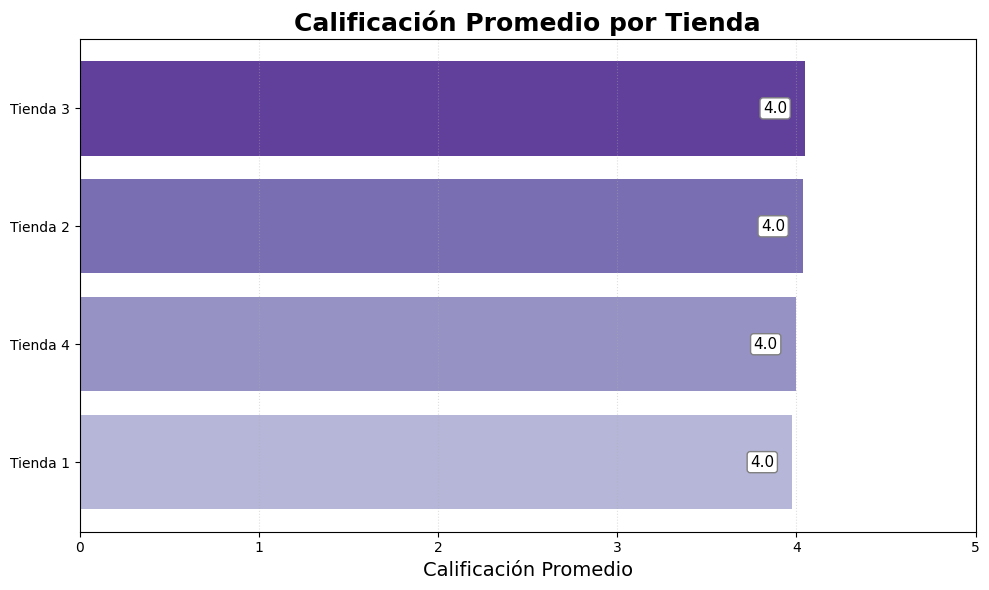

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Agrupar y ordenar por promedio de calificación
calif_promedio = todas_las_tiendas.groupby("Tienda")["Calificación"].mean().sort_values()

# Datos
tiendas = calif_promedio.index
valores = calif_promedio.values
colores = plt.cm.Purples(np.linspace(0.4, 0.8, len(valores)))

# Crear figura
plt.figure(figsize=(10, 6))
bars = plt.barh(tiendas, valores, color=colores, edgecolor='none')

# Título y ejes
plt.title("Calificación Promedio por Tienda", fontsize=18, fontweight="bold")
plt.xlabel("Calificación Promedio", fontsize=14)
plt.xlim(0, 5)
plt.grid(axis='x', linestyle=':', alpha=0.4)

# Agregar etiquetas dentro de las barras
for i, bar in enumerate(bars):
    ancho = bar.get_width()
    plt.text(ancho - 0.1, bar.get_y() + bar.get_height() / 2,
             f'{ancho:.1f}', va='center', ha='right', fontsize=11,
             bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.2'))

plt.tight_layout()
plt.show()




# 4. Productos más y menos vendidos

In [7]:
# Paso 1: Contar la cantidad de veces que se vendió cada producto en cada tienda
ventas = todas_las_tiendas.groupby(["Tienda", "Producto"]).size().reset_index(name="Cantidad")

In [8]:
# Producto más vendido por tienda
mas_vendidos = ventas.sort_values(['Tienda', 'Cantidad'], ascending=[True, False]) \
                     .groupby("Tienda").first().reset_index()

# Producto menos vendido por tienda
menos_vendidos = ventas.sort_values(['Tienda', 'Cantidad'], ascending=[True, True]) \
                       .groupby("Tienda").first().reset_index()



In [9]:
productos_por_tienda = pd.merge(
    mas_vendidos, menos_vendidos,
    on="Tienda",
    suffixes=("_Más_Vendido", "_Menos_Vendido")
)

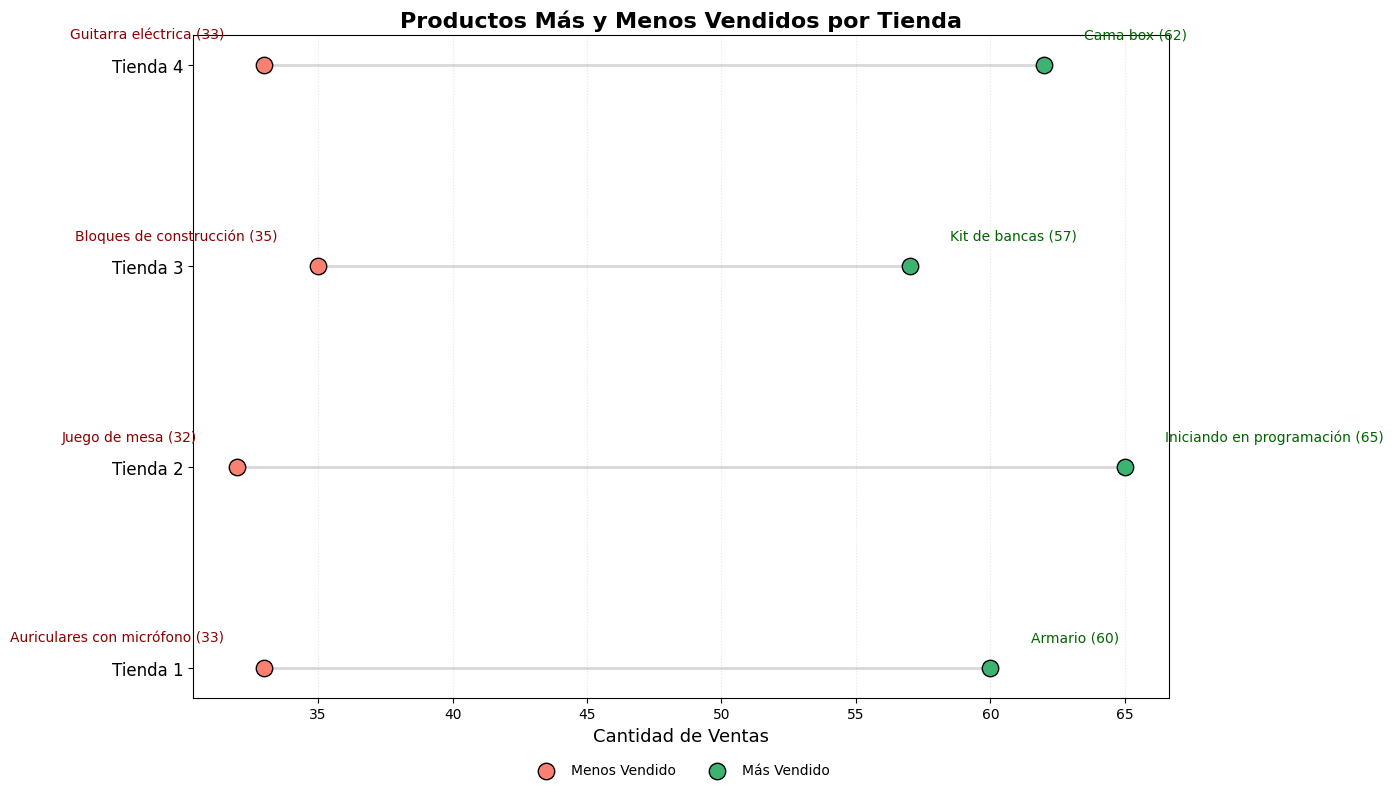

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
tiendas = productos_por_tienda["Tienda"]
max_ventas = productos_por_tienda["Cantidad_Más_Vendido"]
min_ventas = productos_por_tienda["Cantidad_Menos_Vendido"]
prod_max = productos_por_tienda["Producto_Más_Vendido"]
prod_min = productos_por_tienda["Producto_Menos_Vendido"]

# Figura con fondo blanco
plt.figure(figsize=(14, 8), facecolor='white')
y = np.arange(len(tiendas)) * 2

# Fondo blanco y sin estilo predefinido
plt.style.use('default')

# Líneas que conectan puntos
for i in range(len(tiendas)):
    plt.plot([min_ventas[i], max_ventas[i]], [y[i], y[i]], color="gray", lw=2, alpha=0.3)

# Punto menos vendido
plt.scatter(min_ventas, y, color="salmon", s=140, edgecolor="black", label="Menos Vendido", zorder=3)

# Punto más vendido
plt.scatter(max_ventas, y, color="mediumseagreen", s=140, edgecolor="black", label="Más Vendido", zorder=3)

# Etiquetas con productos
for i in range(len(tiendas)):
    plt.text(min_ventas[i] - 1.5, y[i] + 0.3, f"{prod_min[i]} ({min_ventas[i]})",
             ha='right', va='center', fontsize=10, color="darkred")

    plt.text(max_ventas[i] + 1.5, y[i] + 0.3, f"{prod_max[i]} ({max_ventas[i]})",
             ha='left', va='center', fontsize=10, color="darkgreen")

# Ejes
plt.yticks(y, tiendas, fontsize=12)
plt.xlabel("Cantidad de Ventas", fontsize=13)
plt.title("Productos Más y Menos Vendidos por Tienda", fontsize=16, fontweight="bold")
plt.grid(axis='x', linestyle=':', alpha=0.2, color='gray')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2, fontsize=10, frameon=False)
plt.tight_layout()
plt.show()





# 5. Envío promedio por tienda

In [20]:
envio_promedio = todas_las_tiendas.groupby("Tienda")["Costo de envío"].mean().reset_index()

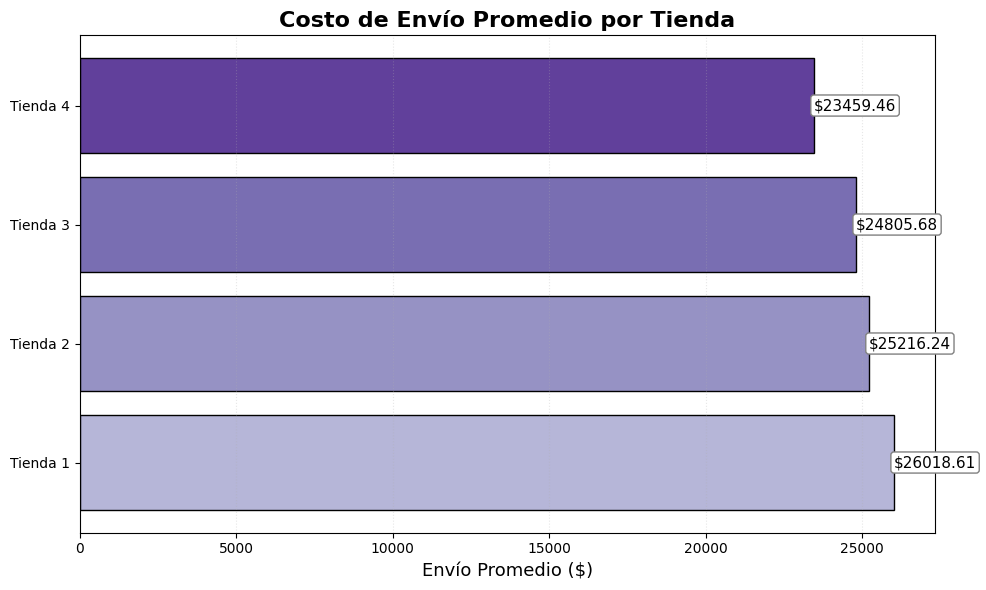

In [21]:
import matplotlib.pyplot as plt

# Datos
tiendas = envio_promedio["Tienda"]
costos = envio_promedio["Costo de envío"]

# Gráfico
plt.figure(figsize=(10, 6))
bars = plt.barh(tiendas, costos, color=plt.cm.Purples(np.linspace(0.4, 0.8, len(tiendas))), edgecolor="black")

# Etiquetas
plt.xlabel("Envío Promedio ($)", fontsize=13)
plt.title("Costo de Envío Promedio por Tienda", fontsize=16, fontweight="bold")

# Agregar etiquetas al final de cada barra
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f"${bar.get_width():.2f}",
             va='center', fontsize=11, color='black', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.2'))

# Ajustes estéticos
plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()


Luego de un análisis detallado de las cuatro tiendas que conforman la cadena Alura Store, se ha determinado que la Tienda 3 es la menos eficiente desde el punto de vista económico y operativo. Esta decisión se fundamenta en criterios cuantitativos y visuales, basados en los datos disponibles de ingresos, costos, márgenes de ganancia y comportamiento general.


**1**. **Rentabilidad reducida**
La Tienda 3 presenta uno de los márgenes de ganancia más bajos de toda la cadena. Aunque genera ventas, sus costos operativos son elevados en proporción a los ingresos obtenidos, lo que compromete seriamente su rentabilidad.


**2.** **Eficiencia operativa deficiente**
En comparación con las otras tiendas, Alura Store 3 muestra un desempeño menos eficiente, con recursos que no se traducen en resultados positivos o competitivos frente a las demás unidades. Esto se observa tanto en la relación entre ingresos y costos, como en el flujo de operaciones reflejado gráficamente.


**3.** **Análisis visual y comparativo**
Los gráficos de desempeño reflejan una tendencia plana y poco favorable, sin indicios de mejora o crecimiento. A diferencia de las otras tres tiendas, que muestran una mayor estabilidad o proyección, la Tienda 3 se destaca negativamente por su bajo dinamismo y menor aportación al negocio en general.

**4.** **Oportunidad estratégica**
Dado que el Sr. Juan busca invertir en un nuevo emprendimiento, la venta de la Tienda 3 representa una oportunidad estratégica para redirigir capital hacia un proyecto con mayor potencial de crecimiento. Esta decisión le permitirá optimizar su cartera de negocios, quedándose con las tiendas más rentables y enfocarse en nuevas oportunidades más prometedoras.

**Conclusión**:
Por los motivos mencionados, se recomienda la venta de la Tienda Alura Store 3 como la alternativa más conveniente para liberar recursos y garantizar un uso más eficiente del capital.



---

